In [1]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def step(coeff_numerator, coeff_denominator, plane):
    return np.polyval(coeff_numerator, plane) / np.polyval(coeff_denominator, plane)

def iterate(plane, coeff_numerator, coeff_denominator, threshold, N):
    Iterations = np.zeros(shape=np.shape(plane))
    for k, array in enumerate(plane):
        for l, x in enumerate(array):
            for i in range(1,N):
                x = step(coeff_numerator, coeff_denominator, x)
                if np.abs(x) > threshold:
                    Iterations[k][l] = i
                    break
    return Iterations

def Julia(range = [-1,1], npoints = 10, maxiter = 100, coeff1 = [1, 0, 1j], coeff2 = [1]):
    x = np.linspace(range[0], range[1], npoints)
    y = x * 1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y
    c = iterate(complex_space, coeff1, coeff2, 1e4, maxiter)
    plt.figure(figsize = (16,12), dpi = 400)
    plt.scatter(np.real(complex_space), np.imag(complex_space), c=c, cmap = 'hot')

In [34]:
def Julia_plot(extent, npoints, maxiter, degree, constant, escape_radius = 2):
    x = np.linspace(extent[0], extent[1], npoints)
    y = x*1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y
    colors = np.zeros(np.shape(complex_space))
    ids = []
    for k, tab in enumerate(complex_space):
        for l, z in enumerate(tab):
            for i in range(maxiter):
                z = z**degree + constant
                if abs(z) > escape_radius:
                    colors[k][l] = i
                    break
    plt.figure(figsize=(16,12))
    plt.scatter(np.real(complex_space), np.imag(complex_space), c=colors, cmap='hot')


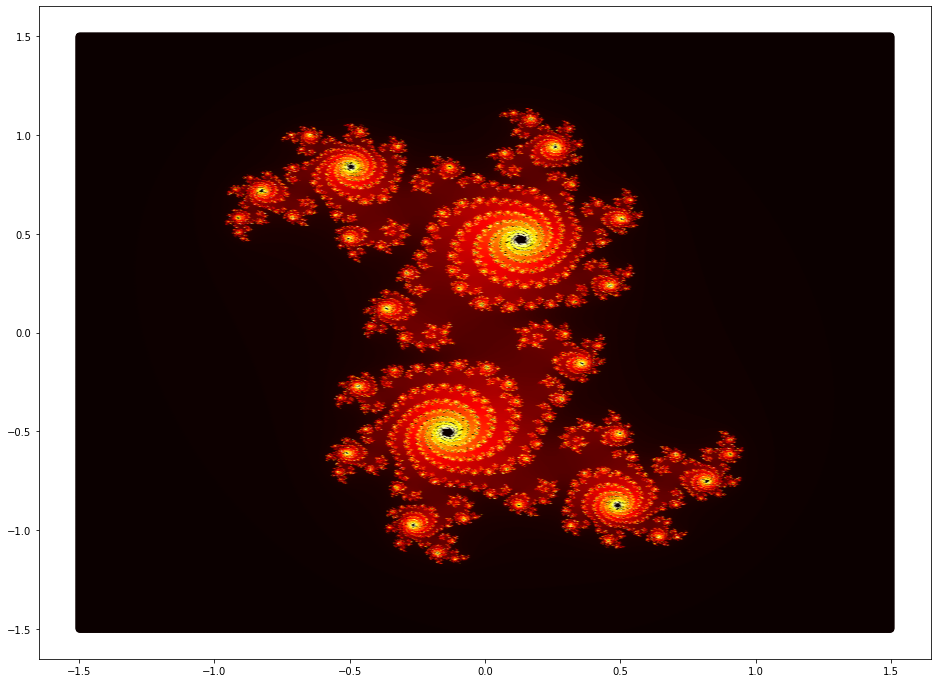

In [30]:
Julia([-3/2, 3/2], 1000, 255, 2, 0.355 + 0.355j)

In [47]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np


def Julia_returnable(complex_space, constant):
    colors = np.zeros(np.shape(complex_space))
    ids = []
    for k, tab in enumerate(complex_space):
        for l, z in enumerate(tab):
            for i in range(50):
                z = z**2 + constant
                if abs(z) > 4:
                    colors[k][l] = i
                    break
    return colors


# Create a function to update the plot based on mouse position
def on_mouse_motion(event):
    # Get the current mouse coordinates
    xmouse, ymouse = event.xdata, event.ydata

    # Clear the previous plot
    plot.clear()
    x = np.linspace(-2, 2, 50)
    y = x*1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y

    # Update the plot based on the mouse position
    if xmouse is not None and ymouse is not None:
        # Create a scatter plot at the mouse position
        colors = Julia_returnable(complex_space, xmouse + ymouse*1j)
        plot.scatter(np.real(complex_space), np.imag(complex_space), c=colors)
    else:
        colors = Julia_returnable(complex_space, 0.355-0.355j)
        # If the mouse is not over the canvas, show a default scatter plot
        plot.scatter(np.real(complex_space), np.imag(complex_space), c=colors)

    canvas_widget.draw()

# Create the main window
root = tk.Tk()
root.title("Dynamic Scatter Plot")

# Create a canvas widget
canvas = tk.Canvas(root, width=400, height=300)
canvas.pack()

# Create a figure for the plot
fig = Figure(figsize=(4, 3), dpi=100)
plot = fig.add_subplot(111)

# Create a FigureCanvasTkAgg to embed the plot in the canvas
canvas_widget = FigureCanvasTkAgg(fig, master=canvas)
canvas_widget.get_tk_widget().pack()

# Bind the motion event to the canvas
canvas_widget.mpl_connect('motion_notify_event', on_mouse_motion)

# Start the tkinter main loop
root.mainloop()
